<a href="https://colab.research.google.com/github/yenamalavinoothna/Campus-Placement-Prediction2/blob/main/campus_placement_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/Train_Data.csv')
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,M,73.976975,Central,77.392691,Others,Science,73.623151,Sci&Tech,84.498310,67.207006,Mkt&HR,Yes,Placed
1,M,62.000000,Others,62.000000,Others,Commerce,60.000000,Comm&Mgmt,63.000000,52.380000,Mkt&HR,Yes,Placed
2,M,80.965242,Others,67.104275,Others,Science,72.482621,Sci&Tech,91.343588,71.392313,Mkt&Fin,No,Placed
3,M,52.000000,Others,65.000000,Others,Arts,57.000000,Others,75.000000,59.810000,Mkt&Fin,Yes,Not Placed
4,F,69.000000,Central,62.000000,Central,Science,66.000000,Sci&Tech,75.000000,67.990000,Mkt&HR,No,Not Placed


In [5]:
data.shape

(670, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          670 non-null    object 
 1   ssc_p           670 non-null    float64
 2   ssc_b           670 non-null    object 
 3   hsc_p           670 non-null    float64
 4   hsc_b           670 non-null    object 
 5   hsc_s           670 non-null    object 
 6   degree_p        670 non-null    float64
 7   degree_t        670 non-null    object 
 8   etest_p         670 non-null    float64
 9   mba_p           670 non-null    float64
 10  specialisation  670 non-null    object 
 11  workex          670 non-null    object 
 12  status          670 non-null    object 
dtypes: float64(5), object(8)
memory usage: 68.2+ KB


In [7]:
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,670.000000,670.000000,670.000000,670.000000,670.000000
mean,68.960017,65.203006,65.229034,73.740025,62.993108
std,10.182563,11.222577,7.157608,12.101840,5.126855
min,42.864579,37.106246,50.000000,50.000000,51.290000
25%,61.619318,60.431420,60.000000,64.199327,59.431996
50%,68.332563,64.753270,64.906329,72.677821,62.481656
75%,77.130019,71.390402,70.271632,83.955186,66.864202
max,89.400000,97.700000,91.000000,97.938047,77.890000


In [8]:
data.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
etest_p           0
mba_p             0
specialisation    0
workex            0
status            0
dtype: int64

In [9]:
data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'etest_p', 'mba_p', 'specialisation', 'workex', 'status'],
      dtype='object')

In [10]:
data.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,M,73.976975,Central,77.392691,Others,Science,73.623151,Sci&Tech,84.49831,67.207006,Mkt&HR,Yes,Placed


In [11]:
data['gender'].unique()

array(['M', 'F'], dtype=object)

In [12]:
data['gender']=data['gender'].map({'M':0, 'F':1})
data.head(2)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,0,73.976975,Central,77.392691,Others,Science,73.623151,Sci&Tech,84.49831,67.207006,Mkt&HR,Yes,Placed
1,0,62.000000,Others,62.000000,Others,Commerce,60.000000,Comm&Mgmt,63.00000,52.380000,Mkt&HR,Yes,Placed


In [13]:
data['ssc_b'].unique()

array(['Central', 'Others'], dtype=object)

In [14]:
data['ssc_b']=data['ssc_b'].map({'Central':0, 'Others':1})
data.head(2)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,0,73.976975,0,77.392691,Others,Science,73.623151,Sci&Tech,84.49831,67.207006,Mkt&HR,Yes,Placed
1,0,62.000000,1,62.000000,Others,Commerce,60.000000,Comm&Mgmt,63.00000,52.380000,Mkt&HR,Yes,Placed


In [15]:
data['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [16]:
data['hsc_b']=data['hsc_b'].map({'Others':1, 'Central':0})
data.head(2)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,0,73.976975,0,77.392691,1,Science,73.623151,Sci&Tech,84.49831,67.207006,Mkt&HR,Yes,Placed
1,0,62.000000,1,62.000000,1,Commerce,60.000000,Comm&Mgmt,63.00000,52.380000,Mkt&HR,Yes,Placed


In [17]:
data['hsc_s'].unique()

array(['Science', 'Commerce', 'Arts'], dtype=object)

In [18]:
data['hsc_s']=data['hsc_s'].map({'Science':2, 'Commerce':1, 'Arts':0})
data.head(2)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,0,73.976975,0,77.392691,1,2,73.623151,Sci&Tech,84.49831,67.207006,Mkt&HR,Yes,Placed
1,0,62.000000,1,62.000000,1,1,60.000000,Comm&Mgmt,63.00000,52.380000,Mkt&HR,Yes,Placed


In [19]:
data['degree_t'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [20]:
data['degree_t']=data['degree_t'].map({'Sci&Tech':2, 'Comm&Mgmt':0, 'Others':1})
data.head(2)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,0,73.976975,0,77.392691,1,2,73.623151,2,84.49831,67.207006,Mkt&HR,Yes,Placed
1,0,62.000000,1,62.000000,1,1,60.000000,0,63.00000,52.380000,Mkt&HR,Yes,Placed


In [21]:
data['specialisation'].unique()

array(['Mkt&HR', 'Mkt&Fin'], dtype=object)

In [22]:
data['specialisation']=data['specialisation'].map({'Mkt&HR':0, 'Mkt&Fin':1})
data.head(2)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,0,73.976975,0,77.392691,1,2,73.623151,2,84.49831,67.207006,0,Yes,Placed
1,0,62.000000,1,62.000000,1,1,60.000000,0,63.00000,52.380000,0,Yes,Placed


In [23]:
data['workex'].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
data['workex']=data['workex'].map({'Yes':1, 'No':0})
data.head(2)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,0,73.976975,0,77.392691,1,2,73.623151,2,84.49831,67.207006,0,1,Placed
1,0,62.000000,1,62.000000,1,1,60.000000,0,63.00000,52.380000,0,1,Placed


In [25]:
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,0,73.976975,0,77.392691,1,2,73.623151,2,84.49831,67.207006,0,1,Placed
1,0,62.000000,1,62.000000,1,1,60.000000,0,63.00000,52.380000,0,1,Placed


In [26]:
data['status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [27]:
data['status']=data['status'].map({'Placed':1, 'Not Placed':0})
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,0,73.976975,0,77.392691,1,2,73.623151,2,84.49831,67.207006,0,1,1
1,0,62.000000,1,62.000000,1,1,60.000000,0,63.00000,52.380000,0,1,1


In [28]:
x=data.drop('status',axis=1)
y=data['status']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

sv=SVC()
sv.fit(x_train,y_train)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [32]:
y_pred1=lr.predict(x_test)
y_pred2=sv.predict(x_test)
y_pred3=knn.predict(x_test)
y_pred4=dt.predict(x_test)
y_pred5=rf.predict(x_test)
y_pred6=gb.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
score1=accuracy_score(y_test,y_pred1)
score2=accuracy_score(y_test,y_pred2)
score3=accuracy_score(y_test,y_pred3)
score4=accuracy_score(y_test,y_pred4)
score5=accuracy_score(y_test,y_pred5)
score6=accuracy_score(y_test,y_pred6)

In [35]:
print(score1,score2,score3,score4,score5,score6)

0.9477611940298507 0.9029850746268657 0.9029850746268657 0.9253731343283582 0.9477611940298507 0.9328358208955224


In [36]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],'ACC':[score1*100,score2*100,score3*100,score4*100,score5*100,score6*100]})

In [37]:
final_data

,Models,ACC
0,LR,94.776119
1,SVC,90.298507
2,KNN,90.298507
3,DT,92.537313
4,RF,94.776119
5,GB,93.283582


In [38]:
import seaborn as sns


<Axes: xlabel='Models', ylabel='ACC'>

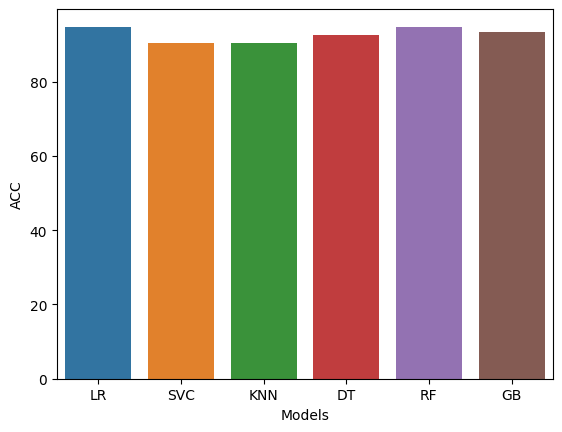

In [39]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

In [41]:
lr=LogisticRegression()
lr.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
test_data=pd.read_csv('/content/drive/MyDrive/Datasets/Test_Data.csv')
test_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,etest_p,mba_p,degree_t,workex,specialisation
0,M,73.163372,Central,68.535901,Central,Science,71.581686,58.954215,58.235587,Comm&Mgmt,Yes,Mkt&Fin
1,M,74.000000,Central,70.000000,Central,Science,72.000000,60.000000,57.240000,Comm&Mgmt,Yes,Mkt&Fin
2,M,85.613691,Central,61.718334,Others,Science,70.962963,59.590873,60.635396,Sci&Tech,Yes,Mkt&HR
3,M,77.909979,Others,81.549151,Others,Science,69.847510,85.178574,64.304440,Sci&Tech,Yes,Mkt&Fin
4,M,80.851350,Others,66.168927,Others,Science,67.743252,87.851350,68.660478,Sci&Tech,Yes,Mkt&Fin


In [44]:
test_data.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
etest_p           0
mba_p             0
degree_t          0
workex            0
specialisation    0
dtype: int64

In [65]:
data['ssc_p'].min(),data['ssc_p'].max()

(42.86457897, 89.4)

In [45]:
test_data['gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
test_data['gender']=test_data['gender'].map({'M':0, 'F':1})
test_data.head(2)

In [47]:
test_data['ssc_b'].unique()

array(['Central', 'Others'], dtype=object)

In [49]:
test_data['ssc_b']=test_data['ssc_b'].map({'Central':0, 'Others':1})
test_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,etest_p,mba_p,degree_t,workex,specialisation
0,0,73.163372,0,68.535901,Central,Science,71.581686,58.954215,58.235587,Comm&Mgmt,Yes,Mkt&Fin
1,0,74.000000,0,70.000000,Central,Science,72.000000,60.000000,57.240000,Comm&Mgmt,Yes,Mkt&Fin
2,0,85.613691,0,61.718334,Others,Science,70.962963,59.590873,60.635396,Sci&Tech,Yes,Mkt&HR
3,0,77.909979,1,81.549151,Others,Science,69.847510,85.178574,64.304440,Sci&Tech,Yes,Mkt&Fin
4,0,80.851350,1,66.168927,Others,Science,67.743252,87.851350,68.660478,Sci&Tech,Yes,Mkt&Fin


In [48]:
test_data['hsc_b'].unique()

array(['Central', 'Others'], dtype=object)

In [50]:
test_data['hsc_b']=test_data['hsc_b'].map({'Central':0, 'Others':1})
test_data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,etest_p,mba_p,degree_t,workex,specialisation
0,0,73.163372,0,68.535901,0,Science,71.581686,58.954215,58.235587,Comm&Mgmt,Yes,Mkt&Fin
1,0,74.000000,0,70.000000,0,Science,72.000000,60.000000,57.240000,Comm&Mgmt,Yes,Mkt&Fin


In [51]:
test_data['hsc_s'].unique()

array(['Science', 'Arts', 'Commerce'], dtype=object)

In [52]:
test_data['hsc_s']=test_data['hsc_s'].map({'Science':2, 'Arts':0, 'Commerce':1})
test_data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,etest_p,mba_p,degree_t,workex,specialisation
0,0,73.163372,0,68.535901,0,2,71.581686,58.954215,58.235587,Comm&Mgmt,Yes,Mkt&Fin
1,0,74.000000,0,70.000000,0,2,72.000000,60.000000,57.240000,Comm&Mgmt,Yes,Mkt&Fin


In [53]:
test_data['degree_t'].unique()

array(['Comm&Mgmt', 'Sci&Tech', 'Others'], dtype=object)

In [54]:
test_data['degree_t']=test_data['degree_t'].map({'Comm&Mgmt':0, 'Sci&Tech':2, 'Others':1})
test_data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,etest_p,mba_p,degree_t,workex,specialisation
0,0,73.163372,0,68.535901,0,2,71.581686,58.954215,58.235587,0,Yes,Mkt&Fin
1,0,74.000000,0,70.000000,0,2,72.000000,60.000000,57.240000,0,Yes,Mkt&Fin


In [ ]:
test_data['workex'].unique()

In [56]:
test_data['workex']=test_data['workex'].map({'Yes':1, 'No':0})
test_data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,etest_p,mba_p,degree_t,workex,specialisation
0,0,73.163372,0,68.535901,0,2,71.581686,58.954215,58.235587,0,1,Mkt&Fin
1,0,74.000000,0,70.000000,0,2,72.000000,60.000000,57.240000,0,1,Mkt&Fin


In [57]:
test_data['specialisation'].unique()

array(['Mkt&Fin', 'Mkt&HR'], dtype=object)

In [58]:
test_data['specialisation']=test_data['specialisation'].map({'Mkt&Fin':1, 'Mkt&HR':0})
test_data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,etest_p,mba_p,degree_t,workex,specialisation
0,0,73.163372,0,68.535901,0,2,71.581686,58.954215,58.235587,0,1,1
1,0,74.000000,0,70.000000,0,2,72.000000,60.000000,57.240000,0,1,1


In [59]:
test_data=test_data.iloc[:,[0,1,2,3,4,5,6,9,7,8,11,10]]
test_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex
0,0,73.163372,0,68.535901,0,2,71.581686,0,58.954215,58.235587,1,1
1,0,74.000000,0,70.000000,0,2,72.000000,0,60.000000,57.240000,1,1
2,0,85.613691,0,61.718334,1,2,70.962963,2,59.590873,60.635396,0,1
3,0,77.909979,1,81.549151,1,2,69.847510,2,85.178574,64.304440,1,1
4,0,80.851350,1,66.168927,1,2,67.743252,2,87.851350,68.660478,1,1


In [60]:
test_pred=lr.predict(test_data)

In [ ]:
test_pred

In [62]:
import pickle

In [63]:
filename='trained_model.sav'
pickle.dump(lr,open(filename,'wb'))

In [64]:
loaded_model=pickle.load(open('trained_model.sav', 'rb'))